<a href="https://colab.research.google.com/github/SyedDanishKhurram/The-Gray-scale-language/blob/main/Gray_scale_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Scala's real-world project repository data
With almost 30k commits and a history spanning over ten years, Scala is a mature programming language. It is a general-purpose programming language that has recently become another prominent language for data scientists.

Scala is also an open source project. Open source projects have the advantage that their entire development histories -- who made changes, what was changed, code reviews, etc. -- are publicly available.

We're going to read in, clean up, and visualize the real world project repository of Scala that spans data from a version control system (Git) as well as a project hosting site (GitHub). We will find out who has had the most influence on its development and who are the experts.

The dataset we will use, which has been previously mined and extracted from GitHub, is comprised of three files:

pulls_2011-2013.csv contains the basic information about the pull requests, and spans from the end of 2011 up to (but not including) 2014.
pulls_2014-2018.csv contains identical information, and spans from 2014 up to 2018.
pull_files.csv contains the files that were modified by each pull request.

In [ ]:
# importing pands numpy and other important lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
p1 = pd.read_csv('/content/pull_files.csv')

In [ ]:
p2 = pd.read_csv('/content/pulls_2011-2013.csv')

In [ ]:
p3 = pd.read_csv('/content/pulls_2014-2018.csv')
pull_files = pd.read_csv('/content/pull_files.csv')

# **Preparing Data and cleaning it**
As panda is a library and it converts the time and date into a striing we will convert it first so it will help us to in analysis
since we have 2 files for the data we will be using 2 keys to add together using append


In [ ]:
pulls = pd.concat([p2,p3])
pulls['date'] = pd.to_datetime(pulls['date'], utc=True)

# Merging data

In [ ]:
data = pd.merge(pulls, pull_files, on='pid')


In [ ]:
data

,pid,user,date,file
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....
...,...,...,...,...
85583,11231462,rklaehn,2014-01-04 22:42:02+00:00,src/library/scala/collection/immutable/HashSet...
85584,11188295,rklaehn,2014-01-02 18:55:33+00:00,src/library/scala/collection/immutable/HashSet...
85585,11188295,rklaehn,2014-01-02 18:55:33+00:00,test/files/run/t6253a.scala
85586,11188295,rklaehn,2014-01-02 18:55:33+00:00,test/files/run/t6253b.scala


here we will be making the columns of month and year and then checking it in a form of graph


In [ ]:
data["month"] = data["date"].dt.month
data["year"] = data["date"].dt.year


In [ ]:
counts = data.groupby(['month', 'year']).agg({'pid': 'count'}).rename(columns={'pid': 'count'})

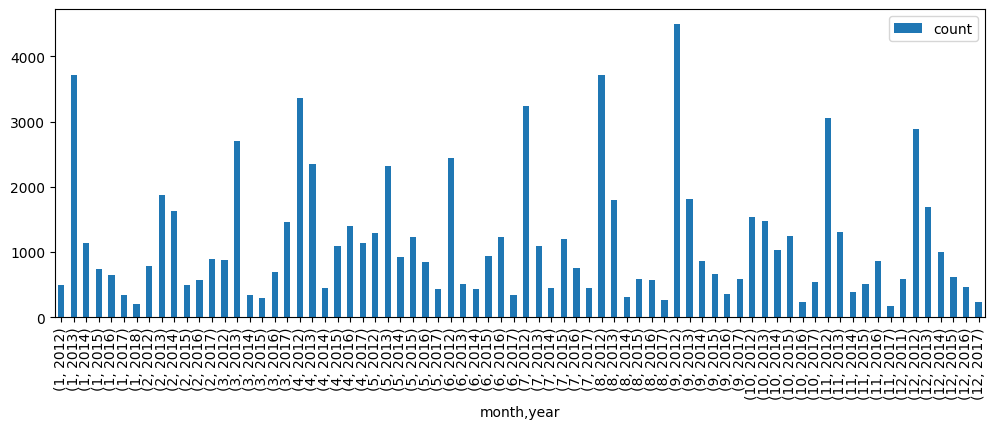

In [ ]:
counts.plot(kind='bar', figsize=(12,4))
plt.show()

The camaraderie in the project
 analyzing and visualizing the number of pull requests submitted by each user.
 This code counts the number of pull requests submitted by each user and visualizes it using a bar chart. It's useful for understanding contribution patterns in a project. 🚀

<Axes: xlabel='user'>

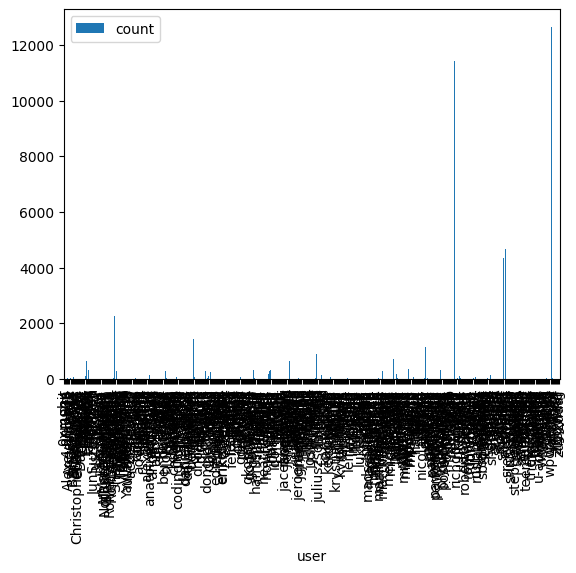

In [ ]:
%matplotlib inline
by_user = data.groupby(['user']).agg({'pid': 'count'}).rename(columns={'pid': 'count'})
by_user.plot(kind='bar')

identifying the last 10 pulls whch were requested then joining the two files

In [ ]:
last_10 = pulls.sort_values(by = 'date').tail(10)
joined_pr = pull_files.merge(last_10, on='pid')
files = set(  joined_pr['file'])
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

checking who made the most pulls request to the given file


In [ ]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'
file_pr = data[data['file'] == file]
author_counts = file_pr.groupby('user').count()
author_counts.nlargest(3, 'file')

,pid,date,file,month,year
user,,,,,
xeno-by,11,11,11,11,11
retronym,5,5,5,5,5
soc,4,4,4,4,4


open sourse projects suffer from the flucting membership
here we will be cheching who made the last ten pull request on a given file?


In [ ]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests that changed the target file
file_pr = pull_files[pull_files['file'] == file]

# Merge the obtained results with the pulls DataFrame
joined_pr = pulls.merge(file_pr, on='pid')

# Find the users of the last 10 most recent pull requests
users_last_10 = set(joined_pr.nlargest(10, 'date')['user'])

# Printing the results
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

now checking the pull request of the two special developers
we will be plotting bar

<Axes: xlabel='date'>

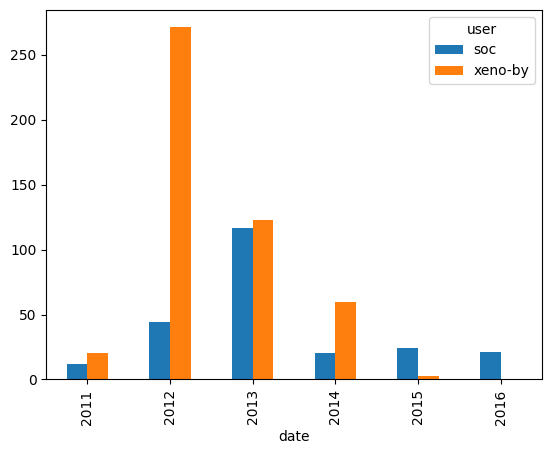

In [ ]:
author =['xeno-by','soc']
by_author = pulls [pulls['user'].isin(author)]
#count the number of pulls requested submmitted each year
counts = by_author.groupby([by_author['user'],by_author['date'].dt.year]).agg({"pid":"count"}).reset_index() #reset index
count_wide = counts.pivot_table(index='date',columns='user',values = 'pid',fill_value=0)
count_wide.plot(kind='bar')





 Visualizing the contributions of specific developer

<Axes: xlabel='date'>

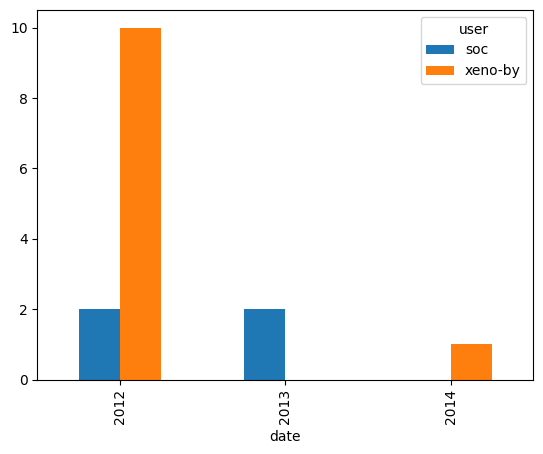

In [ ]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests submitted by the authors, from the `data` DataFrame
by_author = data[data['user'].isin(authors)]

# Select the pull requests that affect the file
by_file = by_author[by_author['file'] == file]

# Group and count the number of PRs done by each user each year
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

# Transform the data into a wide format
by_file_wide = grouped.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
by_file_wide.plot(kind='bar')